# Simple example of poisson regression with `statsmodels`

In [1]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Poisson as poisson

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

/home/seb/py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Example for generating the data is here: 
    
https://www.theanalysisfactor.com/generalized-linear-models-in-r-part-6-poisson-regression-count-variables/

In [2]:
days = [1, 2, 3, 3, 4, 4, 4, 6, 7, 8, 
        8, 8, 8, 12, 14, 15, 17, 17, 17, 18, 19, 19, 20, 
        23, 23, 23, 24, 24, 25, 26, 27, 28, 29, 34, 36, 36, 
        42, 42, 43, 43, 44, 44, 44, 44, 45, 46, 48, 48, 49, 
        49, 53, 53, 53, 54, 55, 56, 56, 58, 60, 63, 65, 67, 
        67, 68, 71, 71, 72, 72, 72, 73, 74, 74, 74, 75, 75, 
        80, 81, 81, 81, 81, 88, 88, 90, 93, 93, 94, 95, 95, 
        95, 96, 96, 97, 98, 100, 101, 102, 103, 104, 105, 
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115]

students = [6, 8, 12, 9, 3, 3, 11, 5, 7, 3, 8, 
            4, 6, 8, 3, 6, 3, 2, 2, 6, 3, 7, 7, 2, 2, 8, 
            3, 6, 5, 7, 6, 4, 4, 3, 3, 5, 3, 3, 3, 5, 3, 
            5, 6, 3, 3, 3, 3, 2, 3, 1, 3, 3, 5, 4, 4, 3, 
            5, 4, 3, 5, 3, 4, 2, 3, 3, 1, 3, 2, 5, 4, 3, 
            0, 3, 3, 4, 0, 3, 3, 4, 0, 2, 2, 1, 1, 2, 0, 
            2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 
            0, 1, 1, 0, 0, 0, 0, 0]

In [3]:
dat = np.array([days, students]).T
df = pd.DataFrame(dat, columns = ['days', 'students'])

The following ways of calling the `statsmodels` api are equivalent in this example

In [4]:
m1 = smf.poisson('students~days', data=df).fit(method='bfgs')

m2 = poisson(endog = dat[:, 1], 
             exog = np.concatenate([np.ones(dat[:, 0].shape).reshape(-1,1),
                                    dat[:, 0].reshape(-1,1)], axis=1)).fit(method='bfgs')

m3 = sm.GLM(endog = dat[:, 1],
            exog = np.concatenate([np.ones(dat[:, 0].shape).reshape(-1,1),
                                   dat[:, 0].reshape(-1,1)], axis=1),
            family = sm.families.Poisson()).fit()

Optimization terminated successfully.
         Current function value: 1.784900
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 1.784900
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12


In [5]:
m1.summary()
# m2.summary()
# m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               students   No. Observations:                  109
Model:                        Poisson   Df Residuals:                      107
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Apr 2020   Pseudo R-squ.:                  0.2269
Time:                        12:06:07   Log-Likelihood:                -194.55
converged:                       True   LL-Null:                       -251.64
Covariance Type:            nonrobust   LLR p-value:                 1.189e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9902      0.084     23.712      0.000       1.826       2.155
days          -0.0175      0.002    -10.114      0.000      -0.021      -0.014
==============================================================================
"""

In [6]:
yhat = m1.predict(df.days)

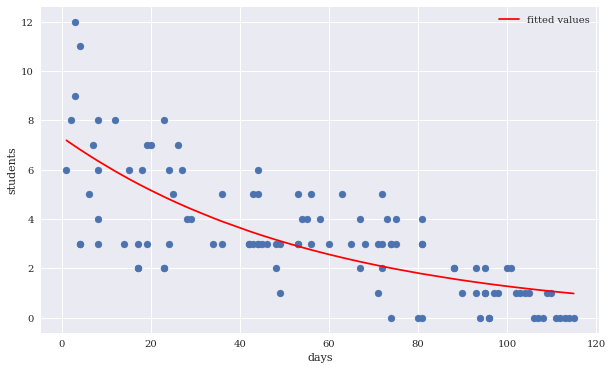

In [7]:
f, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(df.days, df.students)
ax.plot(df.days, yhat, color='red', label='fitted values')
ax.set_xlabel('days')
ax.set_ylabel('students')
ax.legend()
plt.show()